# Danial Azimi - 3rd Assignment first notebook

In [ ]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'architectural-heritage-elements-image64-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1854018%2F3027062%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T113519Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0c5f08184ba419089a8057ca101121a29f7f4cbebe1db2972e9bdf2b9b920eca40220d1289af8719814392e9afd5378814246e754cb56293f5676f61f5fddd5c87bf5501bd483ff7b3e4fc05a53dd94722a4b13ff560d9bb832deb994668af5209a70762d7942c7257d96f9f468b2b4ba4e45a4bf7622543aff664ffafd6a013f3469233e8c3f3c3118023f680a8f715962ade4b64e13832b1f3fb921b76b8d229e21c214ec99a1fb8bf34b6647ca2e7882d2e627740faecaff9446fb9644134f160cd99f7916cd45991898b52e800524a8b46b0747ad7eb6feb00ba8b3f4452dea2288df7fee55b6b1d7836a9d57fd50483e73ddd04895b6becb080ccaf4d91'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-05-01 07:49:42.675392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 07:49:42.675517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 07:49:42.794048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define the path to the directory containing the images
train_dir = "/kaggle/input/architectural-heritage-elements-image64-dataset/train"
test_dir = "/kaggle/input/architectural-heritage-elements-image64-dataset/test"

# Define the list of classes
classes = ['apse', 'column', 'flying_buttress', 'gargoyle', 'altar',
           'bell_tower', 'vault', 'stained_glass', 'dome(inner)', 'dome(outer)']

# Load images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

for label, class_name in enumerate(classes):
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    for img_name in os.listdir(train_class_dir):
        img_path = os.path.join(train_class_dir, img_name)
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img) / 255.0
        train_images.append(img_array)
        train_labels.append(label)

    for img_name in os.listdir(test_class_dir):
        img_path = os.path.join(test_class_dir, img_name)
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img) / 255.0
        test_images.append(img_array)
        test_labels.append(label)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
train_images.shape

(10130, 100, 100, 3)

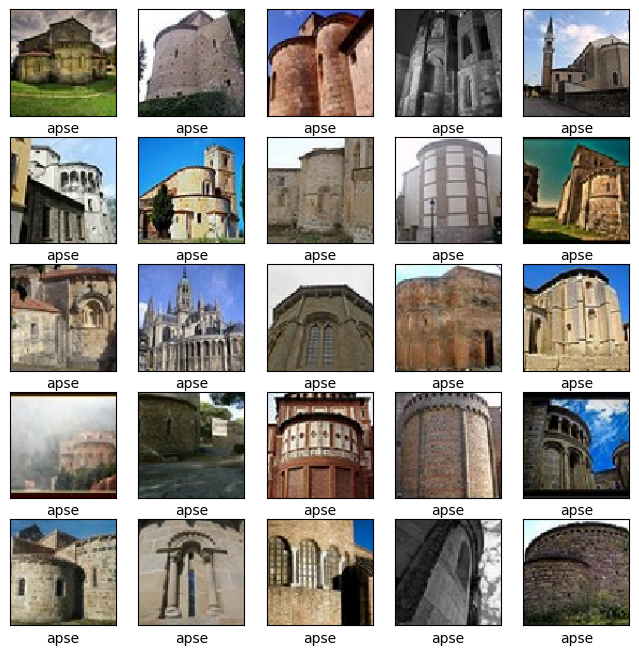

In [ ]:
class_names = classes

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
# Initialize the model
model = models.Sequential()

# Add convolutional layers with L1 regularization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers with L1 regularization
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l1(0.001)))

# Display the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,066 (6.61 MB)

 Trainable params: 1,733,066 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6171 - loss: 1.5999 - val_accuracy: 0.5278 - val_loss: 1.7287
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6180 - loss: 1.5162 - val_accuracy: 0.5192 - val_loss: 1.7777
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6172 - loss: 1.5260 - val_accuracy: 0.5278 - val_loss: 1.7386
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6318 - loss: 1.4772 - val_accuracy: 0.5256 - val_loss: 1.7690
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6260 - loss: 1.5075 - val_accuracy: 0.5285 - val_loss: 1.7960
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6217 - loss: 1.5034 - val_accuracy: 0.5477 - val_loss: 1.7211
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6208 - loss: 1.5175 - val_accuracy: 0.5477 - val_loss: 1.7489
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6282 - loss: 1.4893 - val_accuracy: 0

In [ ]:
from tensorflow.keras.models import save_model
import pickle

# Save the model to the output directory
model.save('/kaggle/working/simple_model.h5')

# Save the training history to the output directory
with open('/kaggle/working/training_history_simple.pkl', 'wb') as file:
    pickle.dump(history.history, file)

# Check if the files are saved
print("Model and training history saved to the output directory:", os.listdir('/kaggle/working'))

Model and training history saved to the output directory: ['training_history_simple.pkl', 'simple_model.h5', '.virtual_documents']


44/44 - 0s - 4ms/step - accuracy: 0.5427 - loss: 1.7501


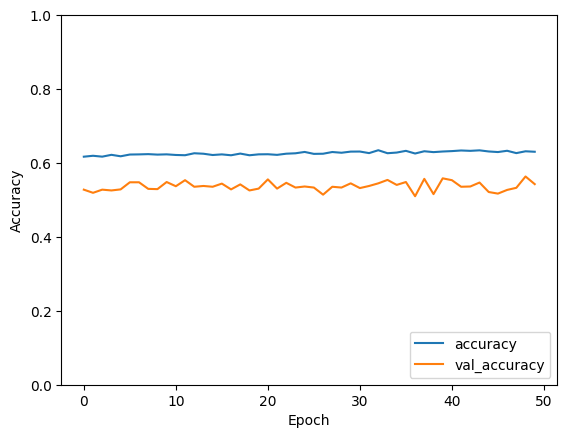

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

# Visualization of passing a sample input to the CNN

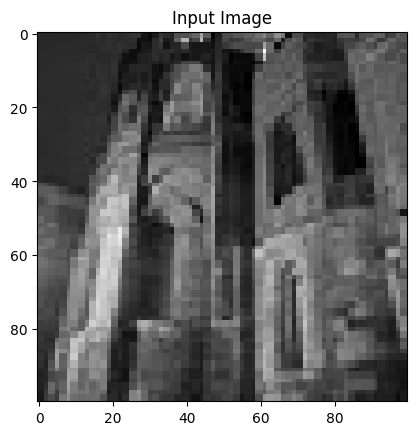

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


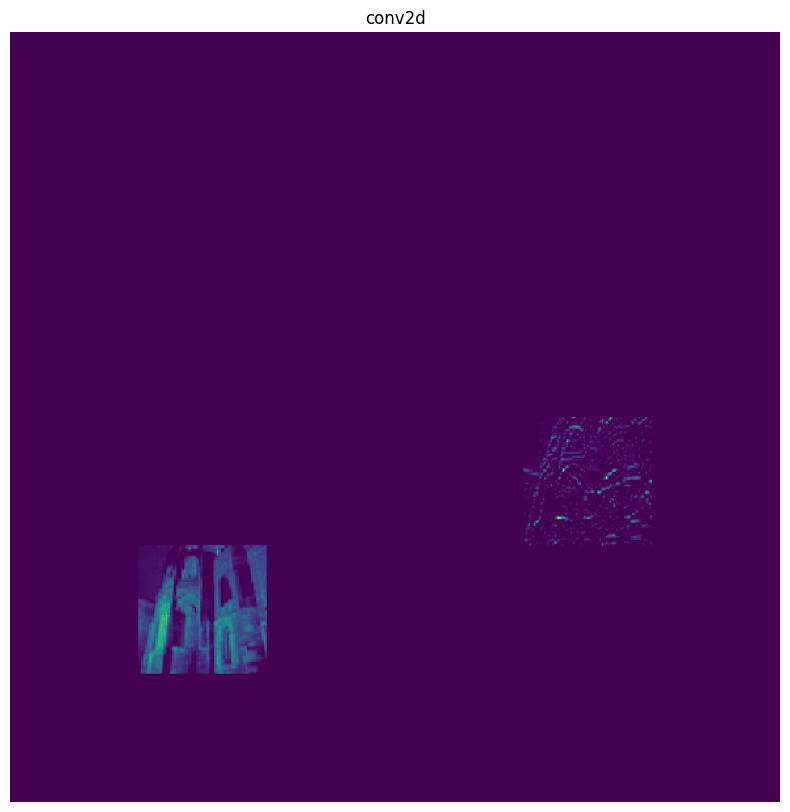

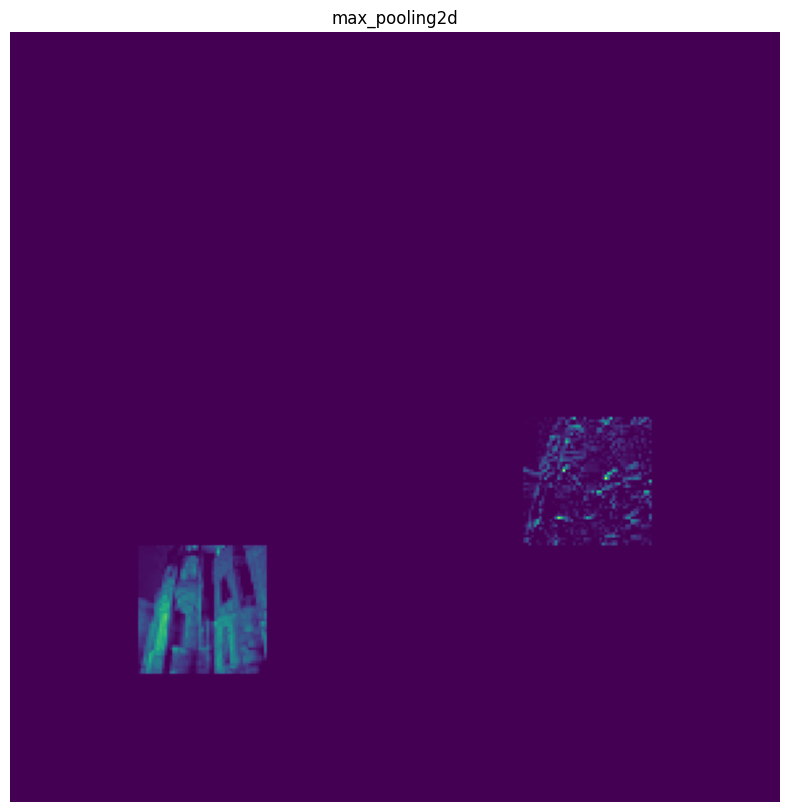

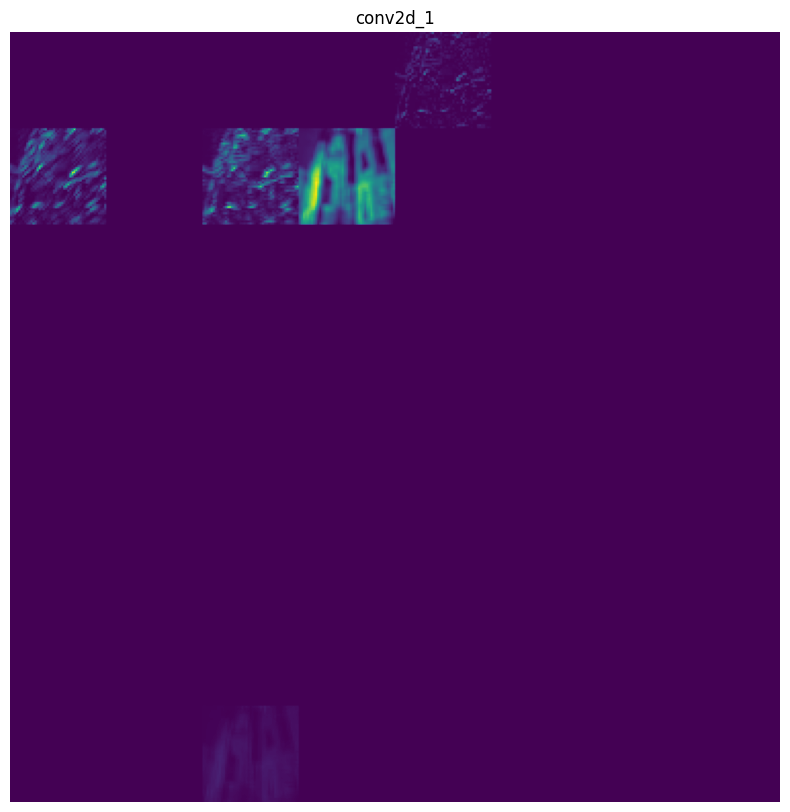

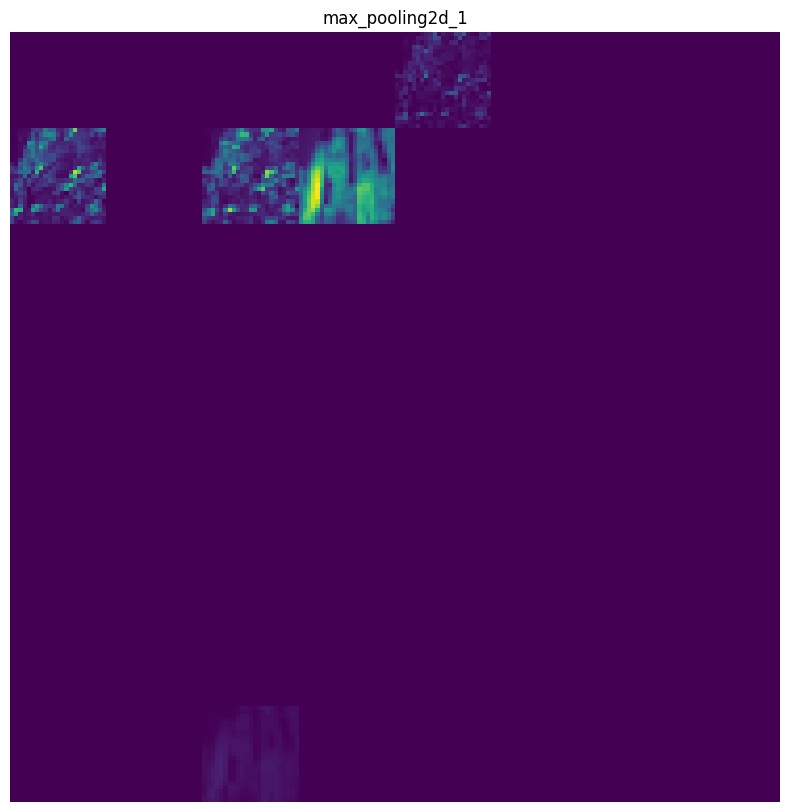

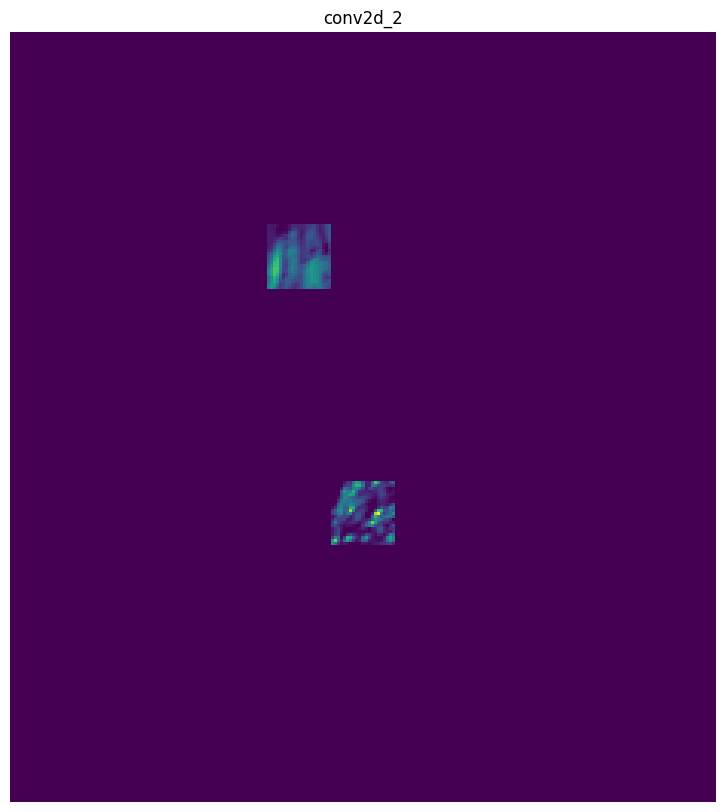

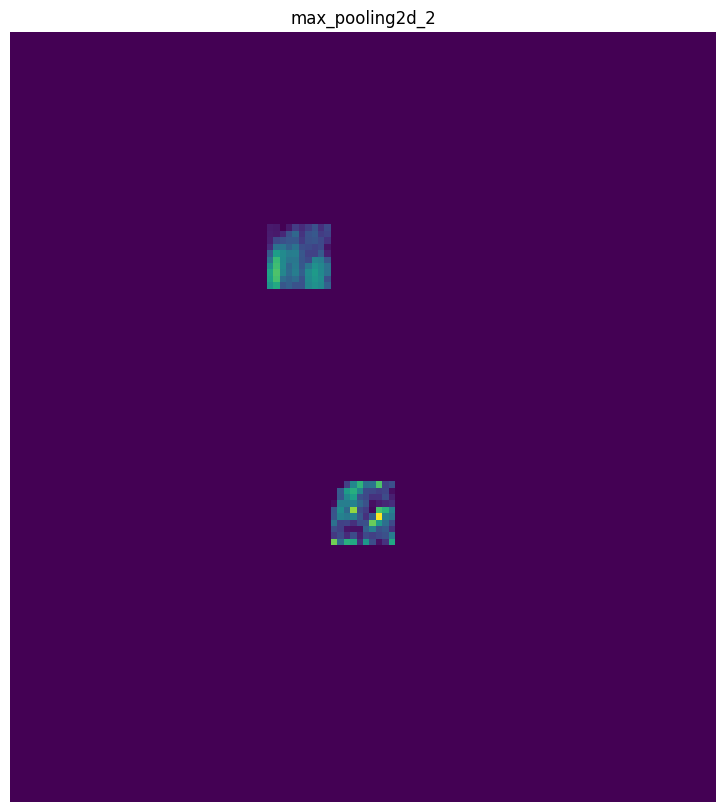

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf

# Choose a sample image from the test set
sample_image = train_images[3]

# Define a function to visualize the feature maps
def visualize_feature_maps(model, sample_image):
    # Plot the input image
    plt.figure()
    plt.imshow(sample_image)
    plt.title("Input Image")
    plt.show()

    # Create a model that outputs the feature maps
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D))]
    feature_map_model = Model(inputs=model.inputs, outputs=layer_outputs)

    # Pass the sample image through each CNN layer and print the output
    output = sample_image.reshape(1, 100, 100, 3)
    layer_names = [layer.name for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D))]
    for layer_name, layer_output in zip(layer_names, feature_map_model.predict(output)):
        if len(layer_output.shape) == 4:  # Check if the layer output is a 4D tensor
            # Normalize the values for better visualization
           # layer_output = (layer_output - layer_output.min()) / (layer_output.max() - layer_output.min())
            num_channels = layer_output.shape[-1]

            # Calculate the number of rows and columns to form a square grid
            side_length = int(np.ceil(np.sqrt(num_channels)))
            rows = min(num_channels, side_length)
            cols = min(num_channels, (num_channels + side_length - 1) // side_length)

            # Concatenate the feature maps to form a square grid
            grid = []
            for i in range(rows):
                row = []
                for j in range(cols):
                    index = i * cols + j
                    if index < num_channels:
                        row.append(layer_output[0, :, :, index])
                    else:
                        row.append(np.zeros_like(layer_output[0, :, :, 0]))
                grid.append(np.concatenate(row, axis=1))
            grid = np.concatenate(grid, axis=0)

            # Plot the concatenated feature maps
            plt.figure(figsize=(10, 10))
            plt.imshow(grid, cmap='viridis')
            plt.title(layer_name)
            plt.axis('off')
            plt.show()

# Print the input after being passed to every CNN layer
visualize_feature_maps(model, sample_image)


# Visualizing the kernels

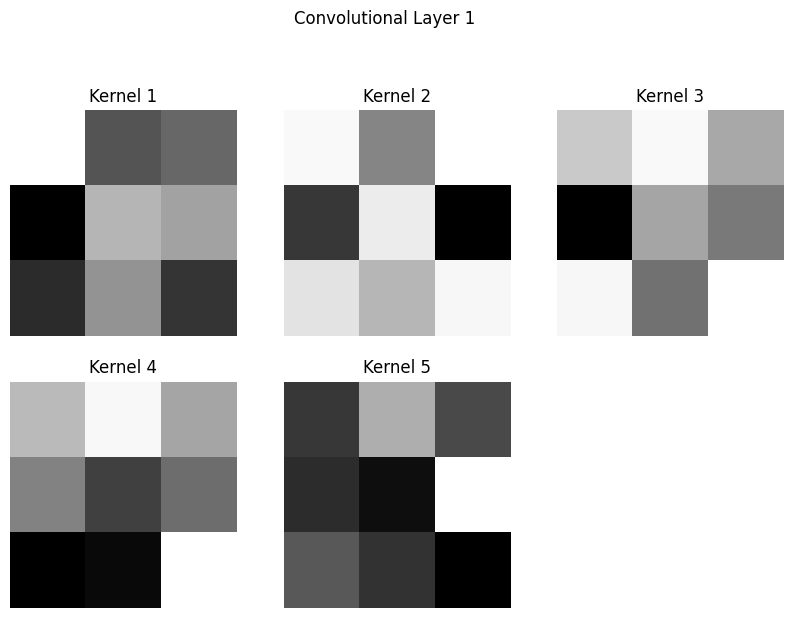

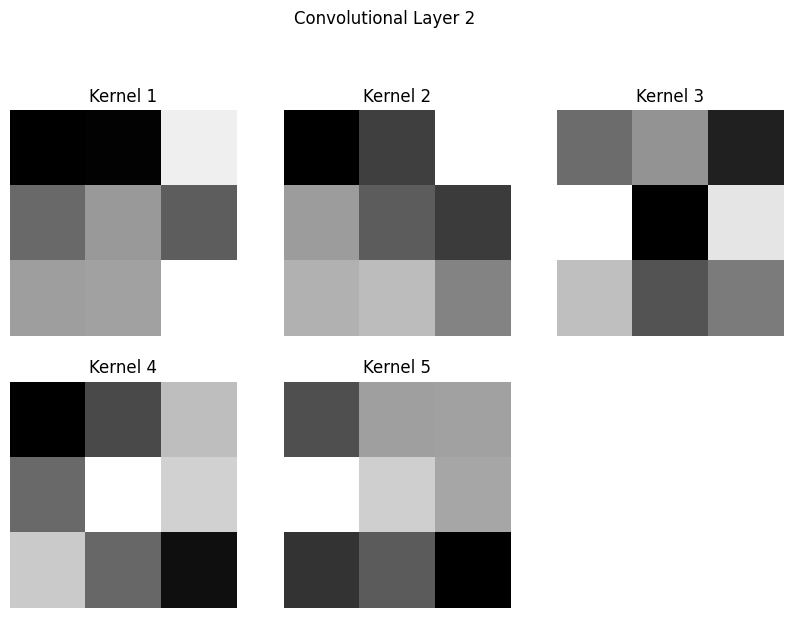

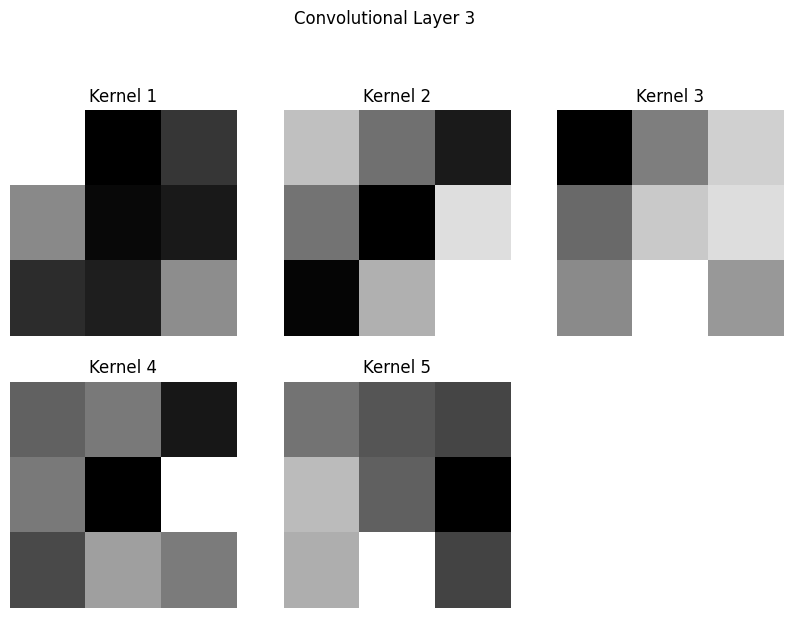

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf

# Define a function to visualize the kernels
def visualize_kernels(model):
    # Create a list to store the learned kernels
    kernels = []

    # Iterate through the layers to find convolutional layers
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            # Get the kernel weights of the layer
            weights = layer.get_weights()[0]
            # Reshape the kernels for visualization
            kernels.append(weights.reshape(*weights.shape[:2], -1))

    # Plot the kernels
    for i, kernel in enumerate(kernels):
        plt.figure(figsize=(10, 10))
        num_kernels = min(5, kernel.shape[-1])  # Limit to 5 kernels
        side_length = int(np.ceil(np.sqrt(num_kernels)))
        for j in range(num_kernels):
            plt.subplot(side_length, side_length, j + 1)
            plt.imshow(kernel[:, :, j], cmap='gray')
            plt.title('Kernel {}'.format(j + 1))
            plt.axis('off')
        plt.suptitle('Convolutional Layer {}'.format(i + 1))
        plt.show()

# Visualize the kernels
visualize_kernels(model)


## Generate Image based on given sample


KeyboardInterrupt



Epoch 0, Loss: [-1.0272216e-33]


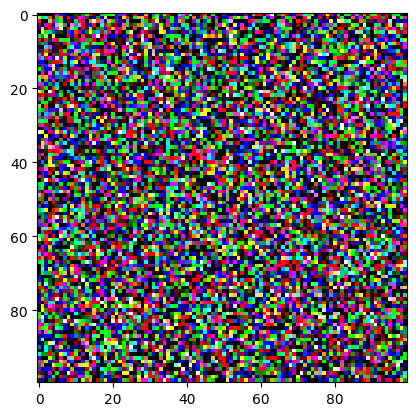

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K

# # we can Load a pre-trained model
# model = ...

# Define the target class index
target_class_index = 9  # from which class 0-9

# Define the input image placeholder
input_image = tf.Variable(tf.random.normal((1, 100, 100, 3)))

# input_image = train_images[1]

# Define the loss function to maximize the target class activation
@tf.function
def loss_function():
    output = model(input_image)
    target_output = output[:, target_class_index]
    return -target_output

# Set up the optimizer
optimizer = tf.keras.optimizers.Adam()

# Optimization loop
epochs = 50
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function()
    gradients = tape.gradient(loss, input_image)
    optimizer.apply_gradients([(gradients, input_image)])

    # Clip pixel values to [0, 1] to keep the image visually plausible
    input_image.assign(tf.clip_by_value(input_image, 0, 1))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Convert the generated image to numpy array
generated_image = input_image.numpy().squeeze()

# Display or save the generated image
plt.imshow(generated_image)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, Input, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2

inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

skip1 = Conv2D(64, (1, 1), activation=None, padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Add()([x, skip1])
x = MaxPooling2D((2, 2))(x)

skip2 = Conv2D(128, (1, 1), activation=None, padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Add()([x, skip2])
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_168 (Conv2D) │ (None, 100, 100,  │        896 │ input_layer_11[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        128 │ conv2d_168[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_76    │ (None, 50, 50,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_170 (Conv2D) │ (None, 50, 50,    │     18,496 │ max_pooling2d_76… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        256 │ conv2d_170[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_171 (Conv2D) │ (None, 50, 50,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        256 │ conv2d_171[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_169 (Conv2D) │ (None, 50, 50,    │      2,112 │ max_pooling2d_76… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_39 (Add)        │ (None, 50, 50,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_169[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_77    │ (None, 25, 25,    │          0 │ add_39[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_173 (Conv2D) │ (None, 25, 25,    │     73,856 │ max_pooling2d_77… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 25, 25,    │        512 │ conv2d_173[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_174 (Conv2D) │ (None, 25, 25,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 25, 25,    │        512 │ conv2d_174[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_172 (Conv2D) │ (None, 25, 25,    │      8,320 │ max_pooling2d_77… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_40 (Add)        │ (None, 25, 25,    │          0 │ batch_normalizat

 Total params: 2,650,570 (10.11 MB)

 Trainable params: 2,649,738 (10.11 MB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.3950 - loss: 5.1372 - val_accuracy: 0.1852 - val_loss: 6.4768
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6009 - loss: 2.2396 - val_accuracy: 0.3191 - val_loss: 4.2551
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6752 - loss: 1.4395 - val_accuracy: 0.3604 - val_loss: 4.3942
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7183 - loss: 1.1318 - val_accuracy: 0.6047 - val_loss: 1.6814
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7660 - loss: 0.9627 - val_accuracy: 0.6453 - val_loss: 1.4847
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7713 - loss: 0.9528 - val_accuracy: 0.6325 - val_loss: 1.3987
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7952 - loss: 0.8346 - val_accuracy: 0.6631 - val_loss: 1.2823
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8005 - loss: 0.8356 -

44/44 - 0s - 6ms/step - accuracy: 0.6816 - loss: 2.7495


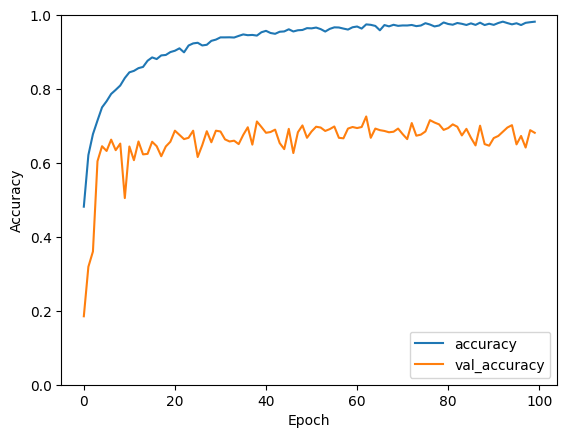

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6816239356994629


# Another Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Conv2DTranspose, Reshape
from tensorflow.keras.regularizers import l1

# Initialize the model
model = models.Sequential()

# Add convolutional layers with L1 regularization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers with L1 regularization
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l1(0.001)))

# Display the model summary
model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_240 (Conv2D)             │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_241 (Conv2D)             │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_242 (Conv2D)             │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,066 (6.61 MB)

 Trainable params: 1,733,066 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2840 - loss: 6.2732 - val_accuracy: 0.3732 - val_loss: 2.4589
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3906 - loss: 2.3355 - val_accuracy: 0.4309 - val_loss: 2.1561
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4127 - loss: 2.1667 - val_accuracy: 0.3974 - val_loss: 2.1829
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4270 - loss: 2.1099 - val_accuracy: 0.4530 - val_loss: 2.0277
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4466 - loss: 2.0252 - val_accuracy: 0.4459 - val_loss: 2.0131
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4595 - loss: 1.9972 - val_accuracy: 0.4822 - val_loss: 1.9251
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4791 - loss: 1.9055 - val_accuracy: 0.4808 - val_loss: 1.9303
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4768 - loss: 1.9137 - val_accuracy: 0

In [ ]:
from tensorflow.keras.models import save_model
import pickle

# Save the model to the output directory
model.save('/kaggle/working/first_model.h5')

# Save the training history to the output directory
with open('/kaggle/working/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

# Check if the files are saved
print("Model and training history saved to the output directory:", os.listdir('/kaggle/working'))

Model and training history saved to the output directory: ['resnet_model.h5', 'resnet_model_continued.h5', 'training_history.pkl', 'training_history_continued.pkl', '.virtual_documents', 'first_model.h5']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


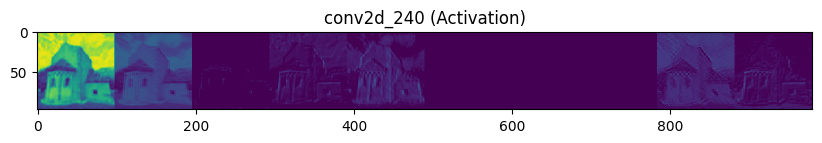

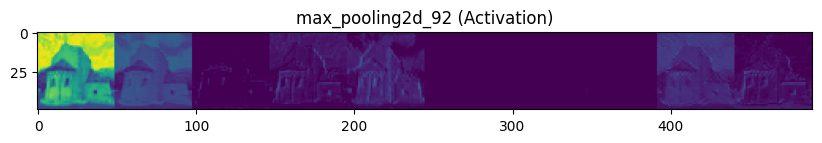

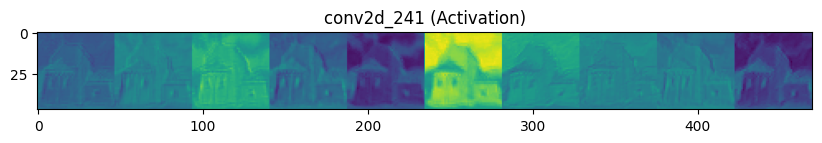

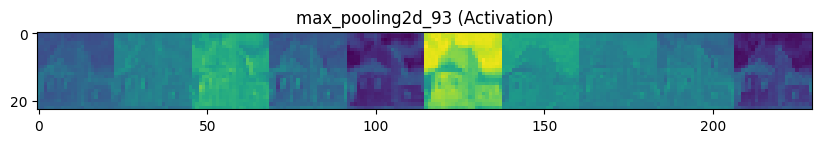

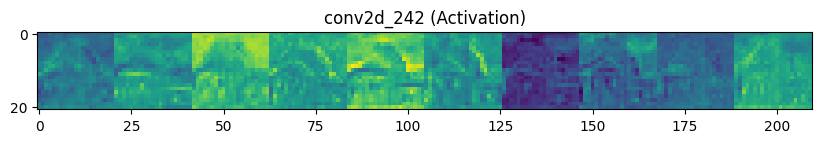

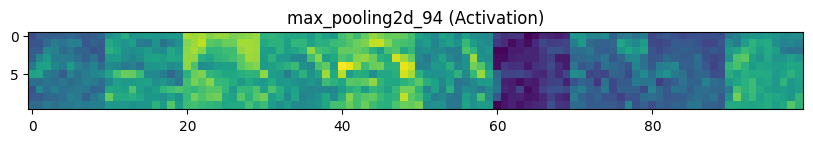

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf

# Choose a sample image from the test set
sample_image = test_images[0:1]

# Define a function to visualize the feature maps
def visualize_feature_maps(model, sample_image):
    # Create a model that outputs the feature maps
    feature_map_model = Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])

    # Get the feature maps
    feature_maps = feature_map_model.predict(sample_image)

    # Plot the feature maps
    for layer, feature_map in zip(model.layers, feature_maps):
        if len(feature_map.shape) == 4:  # Check if the layer produces feature maps
            num_features = 10  # Number of feature maps
            size = feature_map.shape[1]  # Size of each feature map

            # Create a grid to plot the feature maps
            grid = np.zeros((size, size * num_features))

            # Fill the grid with feature map values
            for i in range(num_features):
                grid[:, i*size:(i+1)*size] = feature_map[0, :, :, i]

            # Plot the grid
            plt.figure(figsize=(10, 10))
            plt.imshow(grid, cmap='viridis')
            plt.title(layer.name + ' (Activation)')
            plt.show()

# Visualize the feature maps for the sample image
visualize_feature_maps(model, sample_image)
